# Lecture 5.2 Data I/O: xarray and Pandas

Sep 26, 2019

## 1. Announcements

### Homework Assignment for Week 5: 
Import your data into python using pandas, xarray, or some other method, do some analysis, make some plots and explain your methods and results. You will present this to the class next Tuesday in a powerpoint presentation (or similar), along with an introduction to your dataset. There should be about 5 slides, no more than 10, and your talk should last about 5 min, 8 min max including questions. Load this presentation before class into github and call it HW_5_yourname.

See grading rubric on github

## 2. Warm-up:

Code a function that calculates the volume of a cube, given the length of a side. Use this to plot how volume scales with length of a side. Label your plot.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
#Dr. Harrison
def vol_cube(s):
    #documentation string
    """
    compute volume of cube given length of a side
    """
    return s*s*s

In [4]:
vol_cube(5)

125

* need to plot *

## 3. Lecture Examples:

* Importing text files (we have done this)
* File I/O and pandas intro (I/O means input and output)
* Introduction to xarray and plotting netcdf files 

### Text files

### Spreadsheets

Many of your data sets will be in excel files. We use xarray for netcdf files, and you have just seen that this gave you consise and useful information about the content of the netcdf file. Xarray is built on pandas, which works similarly for spreadsheets.

Download this data file:

https://www.dataquest.io/blog/large_files/movies.xls


#### Load the file

In [25]:
import pandas as pd
%matplotlib inline

In [12]:
ted = pd.read_csv('/Users/srv_veralab/Desktop/ted.txt')

In [15]:
x=2

In [17]:
x

2

In [16]:
ted?

In [19]:
ted.head() #just print out first few data entries

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


#### Transfer the file to a numpy array

In [20]:
ted_numpy= ted.values

In [22]:
ted_numpy.shape

(2550, 17)

### Netcdf files

Goto https://www.hycom.org/

In [27]:
import xarray as xr

C:\ProgramData\Anaconda3\Anaconda 32\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [30]:
bathy = xr.open_dataset('/Users/srv_veralab/Desktop/depth_GOMu0.04_03i.nc',decode_times=False)

In [31]:
bathy

<xarray.Dataset>
Dimensions:    (Latitude: 346, Longitude: 541, MT: 1)
Coordinates:
  * MT         (MT) float64 0.0
    Date       (MT) float64 ...
  * Latitude   (Latitude) float32 18.12 18.16 18.2 18.24 ... 31.84 31.88 31.92
  * Longitude  (Longitude) float32 -98.0 -97.96002 ... -76.44 -76.400024
Data variables:
    depth      (MT, Latitude, Longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    title:        HYCOM
    source:       HYCOM archive file
    experiment:   00.0
    history:      archv2ncdf2d

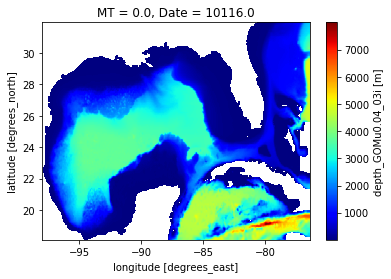

In [35]:
bathy.depth.plot(cmap= 'jet')

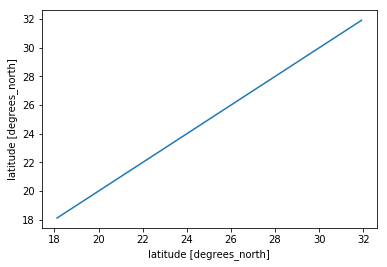

In [33]:
bathy.Latitude.plot()

In [46]:
grid = xr.open_dataset('/Users/srv_veralab/Desktop/hycom_gomu_501_2000010100_t012.nc',decode_times=False)

In [47]:
grid

<xarray.Dataset>
Dimensions:     (depth: 40, lat: 346, lon: 541, time: 1)
Coordinates:
  * time        (time) float64 12.0
  * lat         (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon         (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
  * depth       (depth) float64 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 5e+03
Data variables:
    surf_el     (time, lat, lon) float32 ...
    salinity    (time, depth, lat, lon) float32 ...
    water_temp  (time, depth, lat, lon) float32 ...
    water_u     (time, depth, lat, lon) float32 ...
    water_v     (time, depth, lat, lon) float32 ...
Attributes:
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    history:                   a

In [55]:
grid.depth[9]

<xarray.DataArray 'depth' ()>
array(25.)
Coordinates:
    depth    float64 25.0
Attributes:
    long_name:               Depth
    standard_name:           depth
    units:                   m
    positive:                down
    axis:                    Z
    NAVO_code:               5
    _CoordinateAxisType:     Height
    _CoordinateZisPositive:  down

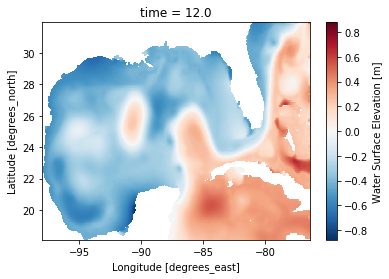

In [50]:
grid.surf_el.plot()

Exercise: Plot the temperature at the surface and at a few different depths:
        *200m
        *1000m
        *2000m

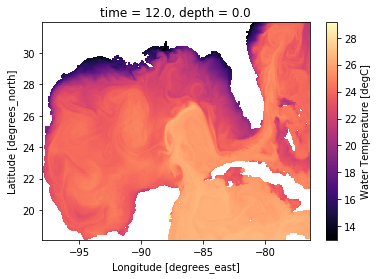

In [64]:
grid.water_temp[0, 0, :, :].plot(cmap = 'magma') #temp at surface 0

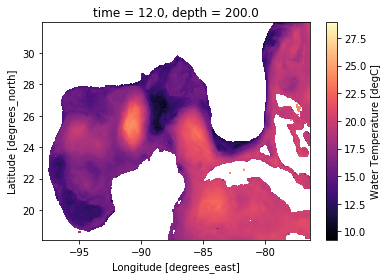

In [63]:
grid.water_temp[0, 22, :, :].plot(cmap = 'magma') #temp at 200

Note you can also modify a pandas data frame into an xarray dataset

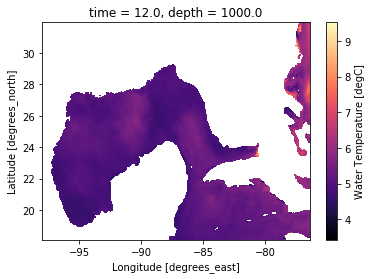

In [73]:
grid.water_temp[0, 32, :, :].plot(cmap = 'magma') #temp at 1000

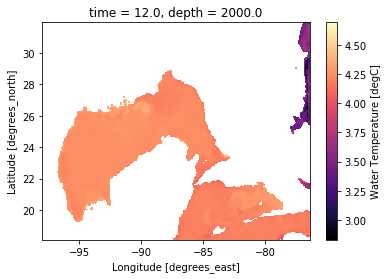

In [72]:
grid.water_temp[0, 35, :, :].plot(cmap = 'magma') #temp at 2000

## 4. Lab:
    
We are doing a pandas tutorial: 

https://github.com/justmarkham/pycon-2019-tutorial
    
Use your headphones, go at your own pace. Remember to write text and comments as you go along. Finish this as homework if you don't complete in class. Note this requires you have a python environment on a non-lab computer, see me if assistance is needed on this.

# 1. Introduction to the dataset

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [78]:
ted.shape

(2550, 17)

In [79]:
ted.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [80]:
ted.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

# 2. Which talks provoke the most online discussion?

In [81]:
ted.sort_values('comments').tail() #subcomments are a limitation, how long it's been online is relevant

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
1787,2673,Our consciousness is a fundamental aspect of o...,1117,TED2014,1395100800,33,David Chalmers,David Chalmers: How do you explain consciousness?,1,1405350484,"[{'id': 25, 'name': 'OK', 'count': 280}, {'id'...","[{'id': 1308, 'hero': 'https://pe.tedcdn.com/i...",Philosopher,"['brain', 'consciousness', 'neuroscience', 'ph...",How do you explain consciousness?,https://www.ted.com/talks/david_chalmers_how_d...,2162764
201,2877,Jill Bolte Taylor got a research opportunity f...,1099,TED2008,1204070400,49,Jill Bolte Taylor,Jill Bolte Taylor: My stroke of insight,1,1205284200,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",Neuroanatomist,"['biology', 'brain', 'consciousness', 'global ...",My stroke of insight,https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
644,3356,"Questions of good and evil, right and wrong ar...",1386,TED2010,1265846400,39,Sam Harris,Sam Harris: Science can answer moral questions,1,1269249180,"[{'id': 8, 'name': 'Informative', 'count': 923...","[{'id': 666, 'hero': 'https://pe.tedcdn.com/im...","Neuroscientist, philosopher","['culture', 'evolutionary psychology', 'global...",Science can answer moral questions,https://www.ted.com/talks/sam_harris_science_c...,3433437
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792


In [82]:
ted['comments_per_view'] = ted.comments / ted.views

In [83]:
ted.sort_values('comments_per_view').tail()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220


In [84]:
ted['views_per_comment'] = ted.views / ted.comments

In [85]:
ted.sort_values('views_per_comment').head() #make results understandable 

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,comments_per_view,views_per_comment
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,0.002220,450.531587
803,834,David Bismark demos a new system for voting th...,422,TEDGlobal 2010,1279065600,36,David Bismark,David Bismark: E-voting without fraud,1,1288685640,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",Voting system designer,"['culture', 'democracy', 'design', 'global iss...",E-voting without fraud,https://www.ted.com/talks/david_bismark_e_voti...,543551,0.001534,651.739808
96,6404,Richard Dawkins urges all atheists to openly s...,1750,TED2002,1012608000,42,Richard Dawkins,Richard Dawkins: Militant atheism,1,1176689220,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",Evolutionary biologist,"['God', 'atheism', 'culture', 'religion', 'sci...",Militant atheism,https://www.ted.com/talks/richard_dawkins_on_m...,4374792,0.001464,683.134291
694,1502,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,489,TED2010,1265760000,32,Sharmeen Obaid-Chinoy,Sharmeen Obaid-Chinoy: Inside a school for sui...,1,1274865960,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",Filmmaker,"['TED Fellows', 'children', 'culture', 'film',...",Inside a school for suicide bombers,https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,0.001421,703.886818
954,2492,Janet Echelman found her true voice as an arti...,566,TED2011,1299110400,35,Janet Echelman,Janet Echelman: Taking imagination seriously,1,1307489760,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",Artist,"['art', 'cities', 'culture', 'data', 'design',...",Taking imagination seriously,https://www.ted.com/talks/janet_echelman,1832930,0.001360,735.525682


# 3. Visualize distribution of comments

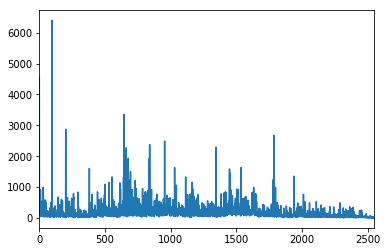

In [87]:
ted.comments.plot() #line plot

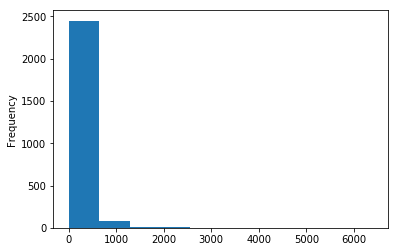

In [89]:
ted.comments.plot(kind= 'hist') #frequency distribution of single numeric variable

paused at 24:27